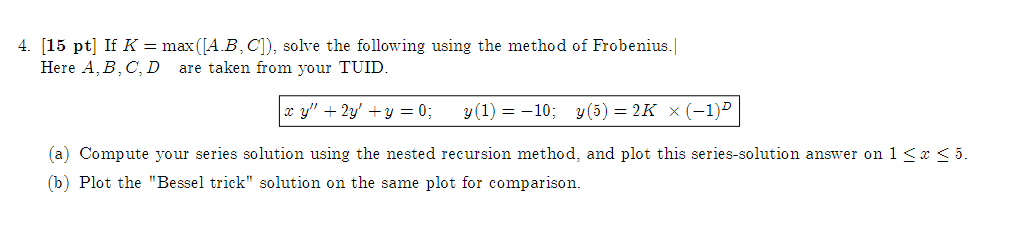

In [22]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.special
from scipy.optimize import fsolve

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special

# Define u1 and u2 as functions using Bessel functions
u1 = lambda x: 1/math.sqrt(x) * scipy.special.i0(2 * np.sqrt(x))
u2 = lambda x: 1/math.sqrt(x) * scipy.special.k0(2 * np.sqrt(x))

u1_values = [u1(1), u1(5)]
u2_values = [u2(1), u2(5)]

# Pre-compute the CC values since they are constants
CC = np.linalg.solve(np.array([[u1_values[0], u2_values[0]], [u1_values[1], u2_values[1]]]), np.array([-10, -18]))

def bessel_trick(x):
    # Use the pre-computed CC values
    return CC[0] * u1(x) + CC[1] * u2(x)  

def series(x, N=50):
    lambda_1, lambda_2 = 0, -1
    C1 = np.zeros(N)
    C2 = np.zeros(N)

    C1[0], C1[1] = 1, 0  # Initial coefficients for lambda_1 = 0
    C2[0], C2[1] = 0, 1  # Initial coefficients for lambda_2 = -1

    # Coefficients for lambda_1 = 0
    for k in range(2, N):
        denominator = k * (k-1) * (2*k)
        if denominator != 0:
            C1[k] = -C1[k-1] / denominator

    # Coefficients for lambda_2 = -1
    for k in range(3, N):
        denominator = (k-1) * (k-2) * (2*k-2)
        if denominator != 0:
            C2[k] = -C2[k-1] / denominator

    def y(x_val, A, B):
        return sum([A * C1[k] * (x_val ** k) + B * C2[k] * (x_val ** (k+1)) for k in range(N)])

    # Solving for A and B using the boundary conditions
    def equations(vars):
        A, B = vars
        eq1 = y(1, A, B) - (-10)
        eq2 = y(5, A, B) - (-18)
        return [eq1, eq2]

    from scipy.optimize import fsolve
    A, B = fsolve(equations, [1, 1])

    return y(x, A, B)

# Define the x values for plotting
x = np.linspace(1, 5, 400)
y_vals_series = [series(val) for val in x]
y_vals_bessel = [bessel_trick(val) for val in x]

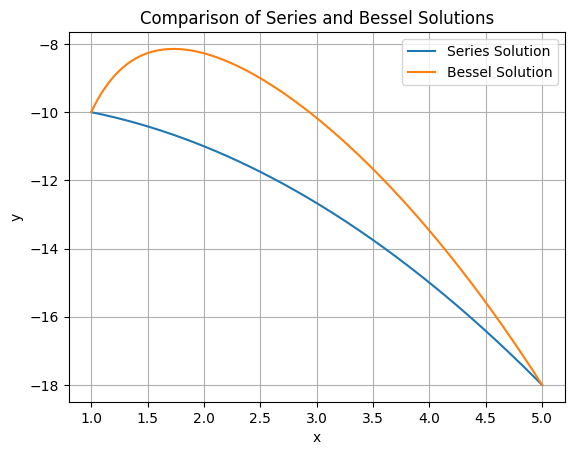

In [24]:
# Plotting the results
plt.figure()
plt.plot(x, y_vals_series, label="Series Solution")
plt.plot(x, y_vals_bessel, label="Bessel Solution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Comparison of Series and Bessel Solutions")
plt.grid(True)
plt.show()